# Notebook Imports and Packages

In [74]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #colormap

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function

## $f(x) = x^2 + x + 1$

In [75]:
def f(x):
    return x**2 + x + 1

In [76]:
# make data
x_1 = np.linspace(start=-3,stop=3, num=100)
x_1

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

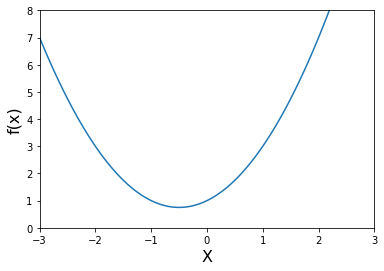

In [77]:
# Plot
plt.xlim([-3, 3])
plt.ylim(0,8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope and Derivatives

Challenge: Create a python function for the derivatives of $f(x)$ called $df(x)$

In [78]:
def df(x):
    return 2*x+1

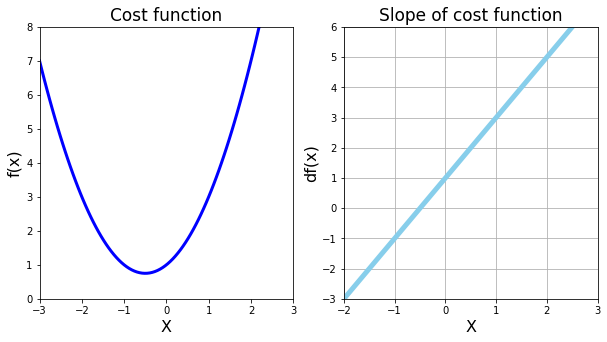

In [79]:
# Plot function and dervative side by side

plt.figure(figsize=[10,5]) # constraits for the whole figure that includes both charts

# First chart: Cost function
plt.subplot(1,2,1) # row column index - how charts arrange
plt.title('Cost function', fontsize=17)

plt.xlim([-3, 3])
plt.ylim(0,8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color="blue", linewidth=3)

# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of cost function', fontsize=17)
plt.xlim([-2, 3])
plt.ylim(-3,6)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.plot(x_1, df(x_1), color="skyblue", linewidth=5)


plt.show()

## Python Loops and Gradient Descent

In [80]:
# Python for loop
for n in range(5):
    print('Hello World', n)
print('End of loops')

Hello World 0
Hello World 1
Hello World 2
Hello World 3
Hello World 4
End of loops


In [81]:
# Python while loop
counter = 0 
while counter < 7:
    print('counting...', counter)
    counter = counter + 1

counting... 0
counting... 1
counting... 2
counting... 3
counting... 4
counting... 5
counting... 6


In [82]:
# Gradient Descent
new_x = 3 # starting point
previous_x = 0
step_multiplier = 0.1 #gamma
precision= 0.00001


x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x 
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    #print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many times:', n)
        break
    
print('local minimum occurs at :', new_x)
print('Slope or df(x) value at this point is ', df(new_x))
print('F(x) value or cost at this point is ', f(new_x))

Loop ran this many times: 50
local minimum occurs at : -0.49996003706460423
Slope or df(x) value at this point is  7.992587079153068e-05
F(x) value or cost at this point is  0.7500000015970362


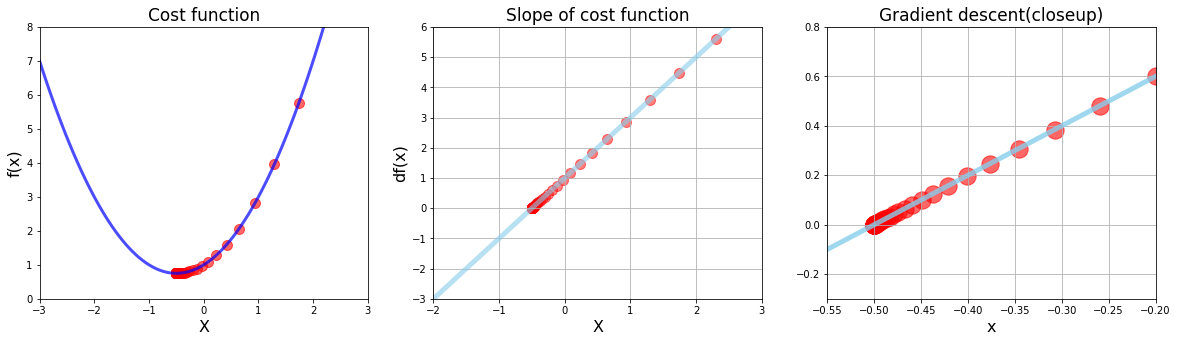

In [83]:
# Super Impose the gradient descent calculation

plt.figure(figsize=[20,5]) # constraits for the whole figure that includes both charts

# First chart: Cost function
plt.subplot(1,3,1) # row column index - how charts arrange
plt.title('Cost function', fontsize=17)

plt.xlim([-3, 3])
plt.ylim(0,8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color="blue", linewidth=3, alpha=0.7)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1,3,2)
plt.title('Slope of cost function', fontsize=17)
plt.xlim([-2, 3])
plt.ylim(-3,6)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.plot(x_1, df(x_1), color="skyblue", linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close up)
plt.subplot(1,3,3)
plt.title('Gradient descent(closeup)', fontsize=17)
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3,0.8)
plt.xlabel('x', fontsize=16)
plt.grid()
plt.plot(x_1, df(x_1), color="skyblue", linewidth=5, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)

plt.show()

# Example 2 - Multiple Minima vs Intial Guess and Advanced Function

## $$g(x) = x^4 - 4x^2 +5 $$

In [84]:
# make some data
x_2 = np.linspace(-2,2,1000)

# Challenge: write the g(x) function and the dg(x) function in Python?
def g(x):
    return x**4 - 4*x**2 +5
def dg(x):
    return 4*x**3 - 8*x

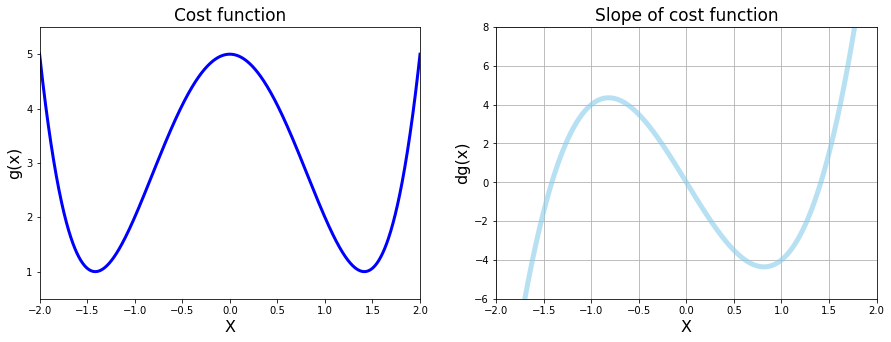

In [85]:
# Super Impose the gradient descent calculation

plt.figure(figsize=[15,5]) # constraits for the whole figure that includes both charts

# First chart: Cost function
plt.subplot(1,2,1) # row column index - how charts arrange
plt.title('Cost function', fontsize=17)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color="blue", linewidth=3)

# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of cost function', fontsize=17)
plt.xlim(-2, 2)
plt.ylim(-6,8)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.plot(x_2, dg(x_2), color="skyblue", linewidth=5, alpha=0.6)


plt.show()

## Gradient Descent as a Python Function

In [86]:
def gradient_descent(derivative_func, intial_guess, multiplier=0.02, precision=0.001,  max_inter=300):
    #ctrl + ] to indent
    # giving default values means the variables are not required
    new_x = intial_guess # starting point
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_inter):
        previous_x = new_x 
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        #print(step_size)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list
    

In [87]:
local_min, list_x, deriv_list = gradient_descent(dg,0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [88]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg,
                                                 intial_guess=0.5,
                                                 multiplier=0.02, 
                                                 precision=0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [89]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg,
                                                 intial_guess=-0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

# put cursor in a func name then shift + tab to grab data from funcs

Local min occurs at: -1.4120887490901561
Number of steps: 34


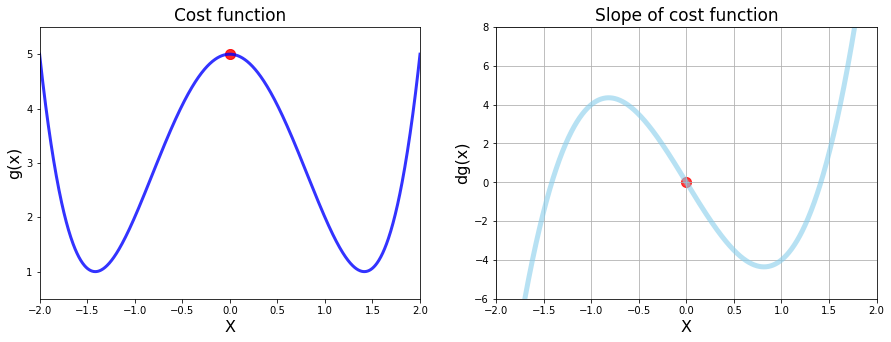

In [90]:
# Calling gradient descent function

# Plot function and derivative and scatter plot side by side

local_min, list_x, deriv_list = gradient_descent(derivative_func=dg,
                                                 intial_guess=0)

plt.figure(figsize=[15,5]) # constraits for the whole figure that includes both charts

# First chart: Cost function
plt.subplot(1,2,1) # row column index - how charts arrange

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color="blue", linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1,2,2)

plt.xlim(-2, 2)
plt.ylim(-6,8)

plt.title('Slope of cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.grid()
plt.plot(x_2, dg(x_2), color="skyblue", linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)


plt.show()

# Example 3 - Digvergence, Overflow, and Python Tuples
## $$h(x)=x^5-2x^4+2$$

In [91]:
# Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5-2*x**4+2
def dh(x):
    return 5*x**4-8*x**3

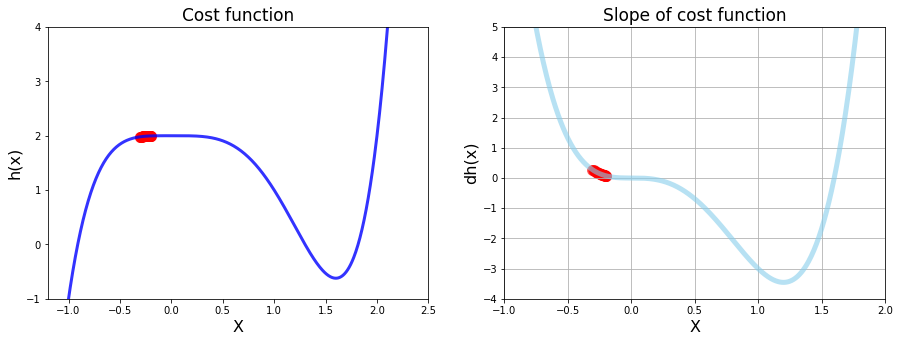

Local min occus at: -0.30845488938251575
Cost at this minimum is: 1.9791028034692557
Number of steps: 41


In [92]:
# Calling gradient descent function

# Plot function and derivative and scatter plot side by side

local_min, list_x, deriv_list = gradient_descent(derivative_func=dh,
                                                 intial_guess=-0.2, max_inter=40)

plt.figure(figsize=[15,5]) # constraits for the whole figure that includes both charts

# First chart: Cost function
plt.subplot(1,2,1) # row column index - how charts arrange

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color="blue", linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1,2,2)

plt.xlim(-1, 2)
plt.ylim(-4,5)

plt.title('Slope of cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)

plt.grid()
plt.plot(x_3, dh(x_3), color="skyblue", linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)


plt.show()

print('Local min occus at:', local_min)
print('Cost at this minimum is:', h(local_min))
print('Number of steps:', len(list_x))

# Python Tuples
## Values seperated by commas

In [93]:
#Creating a tuple
breakfast = 'bacon', 'eggs','avocado'
unlucky_numbers =  13,4,9,26,17

print('I love', breakfast[0])
print('My hotel has no '+str(unlucky_numbers[1])+'th floor')

#lists are homogenous tuples are not
# tuple cannot change the values

tuple_with_single_value=42,
type(tuple_with_single_value)

main, side, greens = breakfast

#sequence unpacking

I love bacon
My hotel has no 4th floor


# The Learning Rate

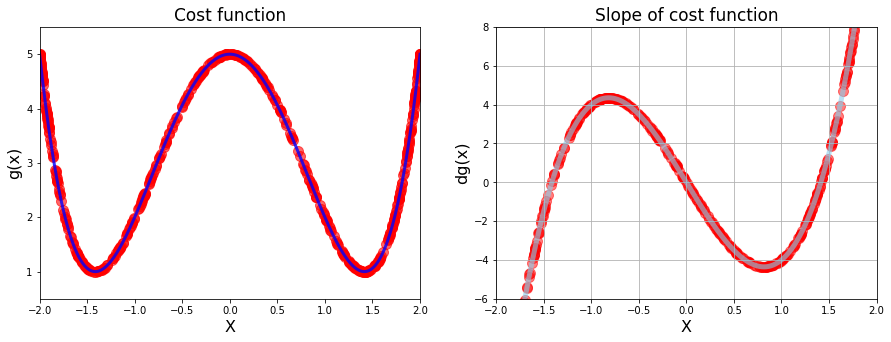

Number of steps is: 501


In [94]:
# Calling gradient descent function

# Plot function and derivative and scatter plot side by side

local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, intial_guess=1.9, multiplier=0.25, max_inter=500)

plt.figure(figsize=[15,5]) # constraits for the whole figure that includes both charts

# First chart: Cost function
plt.subplot(1,2,1) # row column index - how charts arrange

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color="blue", linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1,2,2)

plt.xlim(-2, 2)
plt.ylim(-6,8)

plt.title('Slope of cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.grid()
plt.plot(x_2, dg(x_2), color="skyblue", linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)


plt.show()

print('Number of steps is:', len(list_x))

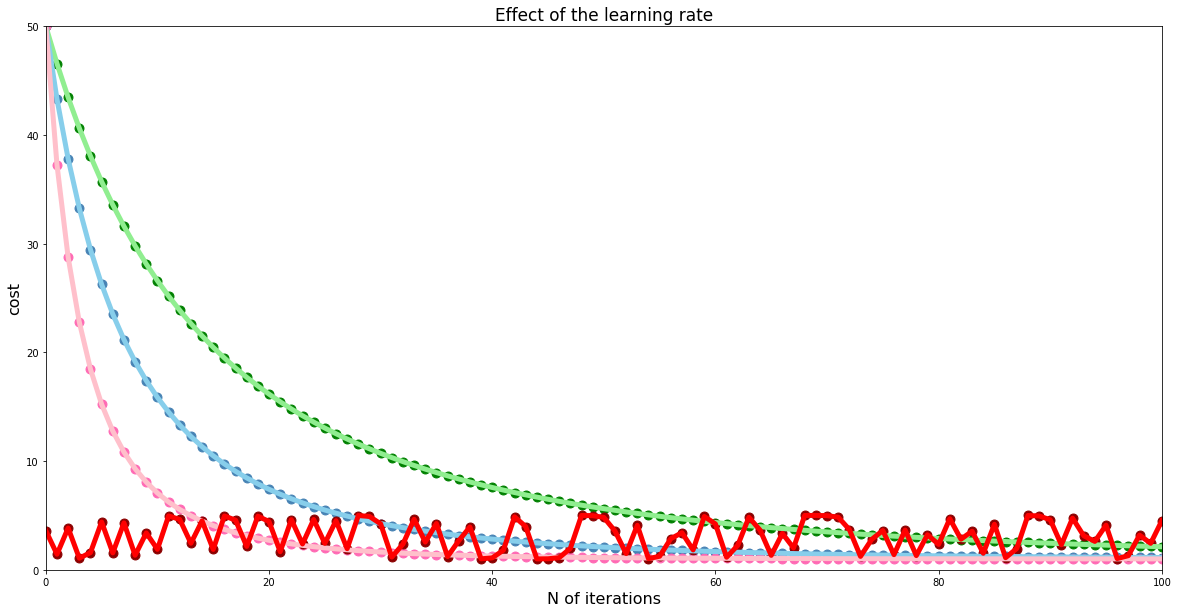

In [95]:
# Run graident descent 3 times
n = 100

low_gamma=local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, intial_guess=3, multiplier=0.0005, precision=0.0001, max_inter=n)

mid_gamma=local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, intial_guess=3, multiplier=0.001, precision=0.0001, max_inter=n)

high_gamma=local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, intial_guess=3, multiplier=0.002, precision=0.0001, max_inter=n)

insane_gamma=local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, intial_guess=1.9, multiplier=0.25, precision=0.0001, max_inter=n)
# Plotting reduction in cost for each interation

plt.figure(figsize=[20,10])

plt.xlim(0, n)
plt.ylim(0,50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('N of iterations', fontsize=16)
plt.ylabel('cost', fontsize=16)

# Values for our charts
# 1) Y axis data: conver the list to numpy arr
low_values = np.array(low_gamma[1])

mid_values = np.array(mid_gamma[1])

high_values = np.array(high_gamma[1])

# 2) X axis Data: create a list from o - n+1
iteration_list =  list(range(0,n+1))


# 3) Plotting low learning rate

plt.plot(iteration_list, g(low_values), color="lightgreen", linewidth=5)
plt.scatter(iteration_list, g(low_values), color="green", s=80 )

# 3) Plotting mid learning rate
plt.plot(iteration_list, g(mid_values), color="skyblue", linewidth=5)
plt.scatter(iteration_list, g(mid_values), color="steelblue", s=80 )

# 3) Plotting high learning rate
plt.plot(iteration_list, g(high_values), color="pink", linewidth=5)
plt.scatter(iteration_list, g(high_values), color="hotpink", s=80 )

# 3) Plotting insane learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color="red", linewidth=5)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color="darkred", s=80 )

# Example 4 - Data Viz with 3D Charts
## Minimise $$f(x,y)= \frac{1}{3^{-x^2-y^2}+1}$$

Minimise $$f(x,y)= \frac{1}{r+1}$$ Where r is $3^{-x^3-y^2}$

In [96]:
def f(x,y):
    r = 3**(-x**2-y**2)
    return 1/(r+1)

In [97]:
# Make data for x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4,y_4 = np.meshgrid(x_4,y_4)

print('Arr after meshgrid', x_4.shape)

Shape of X array (200,)
Arr after meshgrid (200, 200)


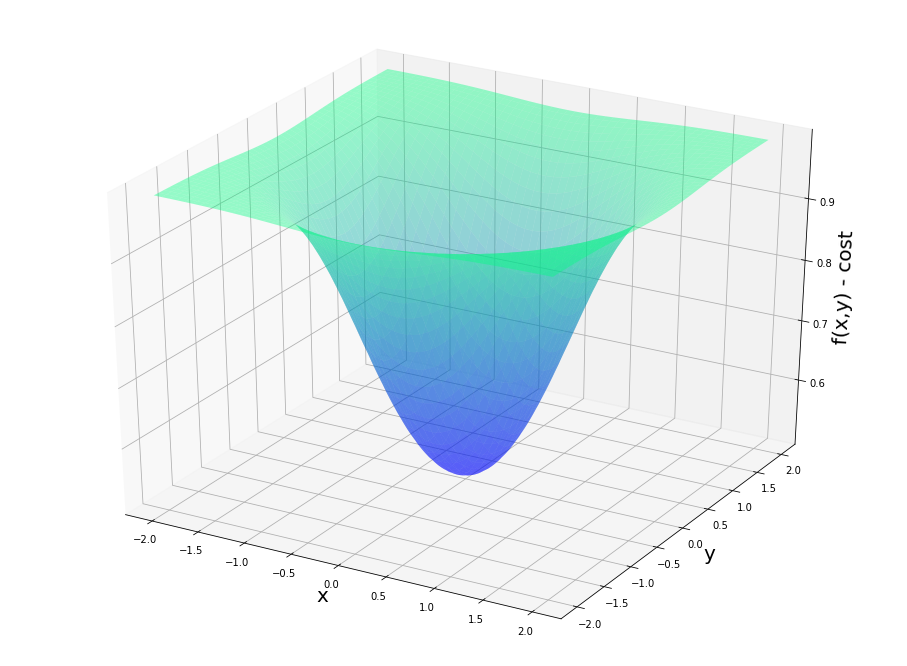

In [98]:
# Generating 3d Plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.winter, alpha=0.4)

ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('f(x,y) - cost', fontsize=20)



plt.show()

## Partial Derivatives & Symbolic Computation
## $$\frac{\partial f}{\partial x} = \frac{ 2x \ln(3) \cdot 3^{-x^2-y^2}}{\left(3^{-x^2-y^2}+1\right)^2} $$
## $$\frac{\partial f}{\partial y} = \frac{ 2y \ln(3) \cdot 3^{-x^2-y^2}}{\left(3^{-x^2-y^2}+1\right)^2} $$

In [99]:
a,b=symbols('x,y')
print('Our cost function f(x, y) is:', f(a,b))
print('Partial derivative write x is:',diff(f(a,b), a))
print('Value of f(x,y) at x=1.8 and y=1.0',
f(a,b).evalf(subs={a:1.8, b:1.0})) #python dictionary
print('Value of partial derivative wrt x:',diff(f(a,b), a).evalf(subs={a:1.8,b:1.0}))

Our cost function f(x, y) is: 1/(3**(-x**2 - y**2) + 1)
Partial derivative write x is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 and y=1.0 0.990604794032582
Value of partial derivative wrt x: 0.0368089716197505


## Batch Gradient Descent with SymPy

In [100]:
#set up
multiplier = 0.1
max_inter = 500

params = np.array([1.8, 1.0]) # intial guess

for n in range (max_inter):
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
    gradients =np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('values in gradient array', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y values of:', params[1])
print('The cost is:', f(params[0], params[1] ))

values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of: 3.45838599885832e-11
Minimum occurs at y values of: 1.92132555492129e-11
The cost is: 0.500000000000000


In [101]:
# Partial derivative functions
def fpx(x, y):
#     r = 3**(-x**2 -y**2)
#     return 2*x*log(3)*r / (r+1)**2
    return  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
    
def fpy(x, y):
#     r = 3**(-x**2 -y**2)
#     return 2*y*log(3)*r / (r+1)**2
    return 2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
# log with out a base returns ln

In [102]:
#set up this is alot faster
multiplier = 0.1
max_inter = 500

params = np.array([1.8, 1.0]) # intial guess

for n in range (max_inter):
    gradient_x = fpx(params[0], params[1] )
    gradient_y = fpy(params[0], params[1] )
    gradients =np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('values in gradient array', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y values of:', params[1])
print('The cost is:', f(params[0], params[1] ))

values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 3.458385998858304e-11
Minimum occurs at y values of: 1.9213255549212797e-11
The cost is: 0.5


## Graphing 3D Gradient Descent & Adv Numpy Arrays

In [103]:
#set up this is alot faster
multiplier = 0.1
max_inter = 500

params = np.array([1.8, 1.0]) # intial guess
values_array = params.reshape(1,2) #rows and columns

for n in range (max_inter):
    gradient_x = fpx(params[0], params[1] )
    gradient_y = fpy(params[0], params[1] )
    gradients =np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array = np.append(values_array, params.reshape(1,2), axis=0)
    #values_array = np.concatenate((values_array, param.reshape(1,2)), axis=0)
    
# Results
print('values in gradient array', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y values of:', params[1])
print('The cost is:', f(params[0], params[1] ))

values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 3.458385998858304e-11
Minimum occurs at y values of: 1.9213255549212797e-11
The cost is: 0.5


In [104]:
# Advanced Numpy Array Practice:

kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black thought', 'mc'],['questlove', 'drums']])
print(hs_band.shape)
print('hs_band[0]:', hs_band[0])
print('hs_band[0][1]:', hs_band[0][1])

the_roots = np.append(arr=hs_band, values=kirk, axis=0) #axis=0 as a row - 1 and will add as a column axis will have to match
print(the_roots)

print('Printing nicknames', the_roots[:,0])
the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']],axis=0)
print('Printing band roless ...', the_roots[:,1])

(1, 2)
(2, 2)
hs_band[0]: ['Black thought' 'mc']
hs_band[0][1]: mc
[['Black thought' 'mc']
 ['questlove' 'drums']
 ['Captain' 'Guitar']]
Printing nicknames ['Black thought' 'questlove' 'Captain']
Printing band roless ... ['mc' 'drums' 'Guitar' 'MC']


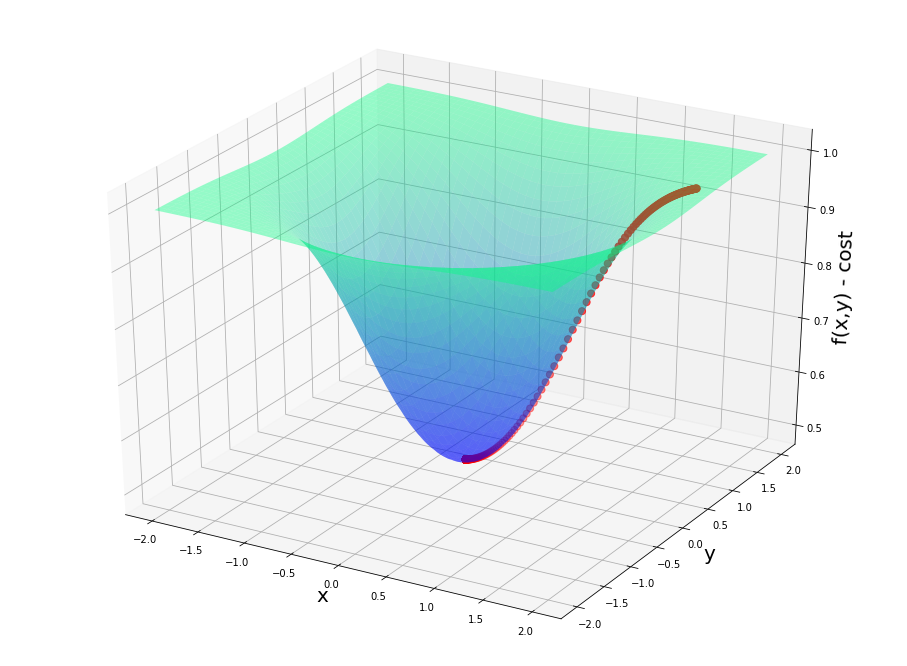

In [105]:
# Generating 3d Plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.winter, alpha=0.4)

ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('f(x,y) - cost', fontsize=20)

ax.scatter(values_array[:, 0], values_array[:,1],
           f(values_array[:,0], values_array[:,1]), s=50, color='red')#x all items in the first row


plt.show()

# Example 5 - Working with data and a real cost function

## mean squared error; a cost function for regression problems

### $$ RSS = \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y - \hat{y} \big)^2 $$

In [106]:
# make sample data
x_5 = np.array([[0.1,1.2,2.4,3.2,4.1,5.7,6.5]]).transpose()
y_5 = np.array([1.7,2.4,3.4,3.0,6.1,9.4,8.2]).reshape(7,1)

print('Shape of x_5 array:' , x_5.shape)
print('Shape of y_5 array:' , y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [107]:
# Quick linear regression
regr = LinearRegression()
regr.fit(x_5, y_5)

print('Theta 0:', regr.intercept_[0] )
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8238120662039519
Theta 1: 1.2255739455419112


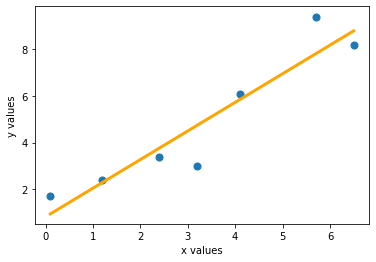

In [108]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [109]:
# y_hat = theta0 +theta1*x (slope x x_values)
y_hat = regr.intercept_[0] + regr.coef_[0][0]*x_5

print('Est values y_hat are: \n',y_hat)
print('Actual values are \n ', y_5)

Est values y_hat are: 
 [[0.94636946]
 [2.2945008 ]
 [3.76518954]
 [4.74564869]
 [5.84866524]
 [7.80958356]
 [8.79004271]]
Actual values are 
  [[1.7]
 [2.4]
 [3.4]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [110]:
def mse(y, y_hat):
    mse_calc = (1/y.size) * sum((y-y_hat)**2) 
    #y.size will return the number of values
#     mse_calc = np.average((y-y_hat)**2, axis=0)
    return mse_calc
mse(y_5, y_hat)
    

array([0.95721226])

In [111]:
print('MSE regression',mean_squared_error(y_5, regr.predict(x_5)))

MSE regression 0.957212264510716


## 3D plot for the MSE cost function
### Make data for thetas


In [112]:
nr_thetas =200

th_0 =np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 =np.linspace(start=-1, stop=3, num=nr_thetas)

plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


### Calc MSE using nested for loops

In [113]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
#         print(plot_t0[i][j])
#         print(plot_t0[i][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


In [114]:
# Nested loop practice
for i in range(3):
    for j in range(3):
        print(f'value of i is {i} and j is {j}')

value of i is 0 and j is 0
value of i is 0 and j is 1
value of i is 0 and j is 2
value of i is 1 and j is 0
value of i is 1 and j is 1
value of i is 1 and j is 2
value of i is 2 and j is 0
value of i is 2 and j is 1
value of i is 2 and j is 2


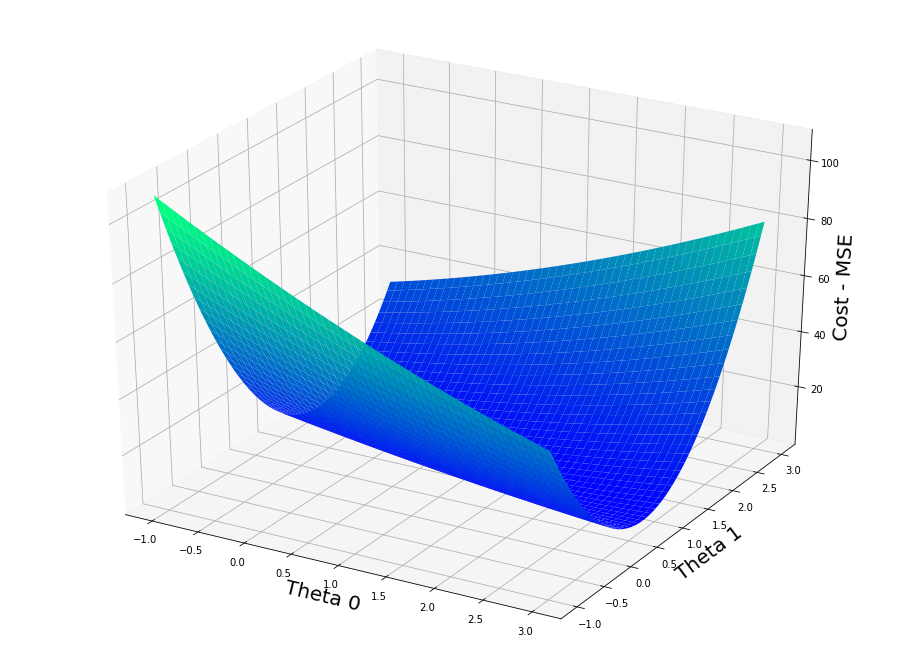

In [117]:
# plotting mse
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.winter)

plt.show()

In [121]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min mSE for Theta 0 at plot_t0[111][91]', plot_t0[111][91])
print('Min mSE for Theta 1 at plot_t1[111][91]', plot_t1[111][91])

Min value of plot_cost 0.9573691140555617
Min occurs at (i,j): (111, 90)
Min mSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min mSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y - \hat{y} \big)^2 $$
### $$ Linear Reg = \hat{y} = \theta_0 + \theta_1x$$
### $$ = \frac{1}{n} \sum_{i=1}^{n} \big(y - ( \theta_0 + \theta_1x) \big)^2 $$
### $$ = \frac{1}{n} \sum_{i=1}^{n} \big(y - \theta_0 + \theta_1x \big)^2 $$
### $$ = \frac{1}{n} \sum_{i=1}^{n} \big(y^2-2\theta_0y-2\theta_1xy+\theta_0^2+2\theta_0\theta_1x+\theta_1^2x^2) $$

### $$ \frac{\partial MSE}{\partial \theta_0} = \frac{1}{n} \sum_{i=1}^{n} \big(-2y + 2\theta_0 + 2\theta_1x) $$
### $$ = \frac{1}{n} \sum_{i=1}^{n} \big(-2 \big) \big(y -\theta_0 - \theta_1x \big) $$
### $$ = -\frac{2}{n} \sum_{i=1}^{n}  \big(y -\theta_0 - \theta_1x \big) $$
### $$ = -\frac{2}{n} \sum_{i=1}^{n}  \big(y^{(i)} -\theta_0 - \theta_1x^{(i)} \big) $$
### $$ \frac{\partial MSE}{\partial \theta_1} = -\frac{2}{n} \sum_{i=1}^{n}  \big(y^{(i)} -\theta_0 - \theta_1x^{(i)} \big)\big(x^{(i)}\big) $$

## PartialDerivatives of MSE w.r.t $\theta_0$ and $\theta_1$
## $$ \frac{\partial MSE}{\partial \theta_1} = -\frac{2}{n} \sum_{i=1}^{n}  \big(y^{(i)} -\theta_0 - \theta_1x^{(i)} \big)\big(x^{(i)}\big) $$

### $$ \frac{\partial MSE}{\partial \theta_0} = -\frac{2}{n} \sum_{i=1}^{n}  \big(y^{(i)} -\theta_0 - \theta_1x^{(i)} \big) $$

### MSE & GRADIENT DESCENT


In [122]:
# x values, y_values, arr of theta params(theta_0 at index 0, theta_1 at index 1)
def grad(x,y,thetas):
    n = y.size
    theta0_slope = (-2/n) * sum(y-thetas[0]-thetas[1]*x) 
    theta1_slope = (-2/n) * sum((y-thetas[0]-thetas[1]*x)*x)
    return np.array([theta0_slope[0], theta1_slope[0]])
# return np.append(arr=theta0_slope, values=theta1_slope)
# return np.concatenate(arr=theta0_slope, values=theta1_slope, axis=0)

In [126]:
multiplier =0.01
thetas =np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0]+ thetas[1]*x_5))
    
print('Min occurs at Theta0:', thetas[0])
print('Min occurs at Theta1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0]+thetas[1]*x_5))

Min occurs at Theta0: 0.8295819377327787
Min occurs at Theta1: 1.2243232460292104
MSE is: [0.95722208]


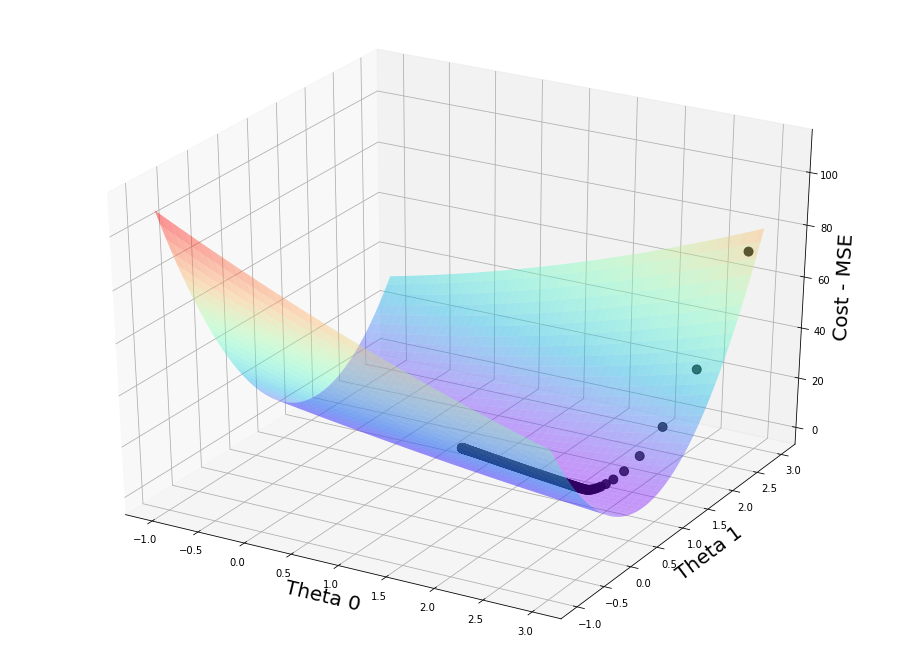

In [131]:
# plotting mse
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:,0], plot_vals[:,1], mse_vals, s=80,color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)

plt.show()